# **Теоретические основы радиально-базисных нейронных сетей**

## **1. Историческое развитие и математические основы**

### **1.1 Происхождение и эволюция**

Радиально-базисные нейронные сети (РБНС) появились в конце 1980-х годов как значимая альтернатива традиционным архитектурам нейронных сетей. Они были разработаны на основе математической теории интерполяции функций с использованием радиально-базисных функций, особенно в контексте аппроксимации разреженных данных. Фундаментальные работы Брумхеда и Лоу (1988), а также Муди и Даркена (1989) заложили основу для РБНС, предложив архитектуры нейронных сетей, которые использовали радиально-базисные функции в качестве функций активации в скрытом слое.

Развитие РБНС было обусловлено несколькими теоретическими преимуществами:
* Прочная математическая основа в теории аппроксимации
* Более быстрое обучение по сравнению с многослойными персептронами (МСП)
* Способность избегать проблем локальных минимумов, характерных для метода обратного распространения ошибки
* Интерпретируемые представления скрытого слоя

### **1.2 Математические основы**

РБНС базируются на математической теории аппроксимации, в частности, в контексте интерполяции функций. Теоретический фундамент опирается на теорему Ковера и свойство универсальной аппроксимации, которое утверждает, что любая непрерывная функция может быть аппроксимирована с произвольной точностью при достаточном количестве базисных функций.

Аппроксимация основана на принципе, что сложная функция может быть построена как линейная комбинация более простых функций (радиально-базисных функций), центрированных в различных точках входного пространства. Этот подход фундаментально отличается от стратегии глобальной аппроксимации, используемой в традиционных многослойных персептронах.

### **1.3 Основная структура**

Стандартная архитектура РБНС состоит из трех слоев:
1. **Входной слой**: Передает входные признаки непосредственно в скрытый слой без трансформации
2. **Скрытый слой**: Содержит нейроны с радиально-базисными функциями активации
3. **Выходной слой**: Выполняет взвешенную сумму выходов скрытых нейронов, обычно с линейной активацией

Математическое представление выхода РБНС для входного вектора x задается:

$$y(\mathbf{x}) = \sum_{i=1}^{N} w_i \cdot \phi(||\mathbf{x} - \mathbf{c}_i||) + b$$

где:

* $N$ - количество скрытых нейронов
* $w_i$ - выходные веса
* $\mathbf{c}_i$ - центры радиально-базисных функций
* $\phi(\cdot)$ - радиально-базисная функция
* $||\mathbf{x} - \mathbf{c}_i||$ - евклидово расстояние между входным вектором и центром
* $b$ - смещение (bias)

### **1.4 Функции активации**

Определяющей характеристикой РБНС является использование радиально-базисных функций в качестве функций активации. Эти функции формируют выходные значения, которые зависят только от расстояния между входным вектором и фиксированной точкой (центром). Наиболее распространенной функцией активации является функция Гаусса:

$$\phi(r) = \exp \left( -\frac{r^2}{2\sigma^2} \right)$$

где:

* $r = ||\mathbf{x} - \mathbf{c}||$ - расстояние от центра
* $\sigma$ - параметр ширины, контролирующий разброс функции

Другие радиально-базисные функции включают:

* **Мультиквадратичная**: $$\phi(r) = \sqrt{r^2 + \sigma^2}$$
* **Обратная мультиквадратичная**: $$\phi(r) = \frac{1}{\sqrt{r^2+\sigma^2}}$$
* **Тонкопластинчатый сплайн**: $$\phi(r) = r^2 \log(r)$$

Недавние исследования Чжао и др. (2019) были посвящены полностью обучаемым базисным функциям активации, позволяющим сетям адаптировать свою нелинейность в процессе обучения для улучшения производительности ([DeepLABNet](https://www.alphaxiv.org/abs/1911.09257)).

## **2. Сети РБФ в сравнении с другими архитектурами нейронных сетей**

### **2.1 Сравнение с многослойными персептронами (МСП)**

РБНС фундаментально отличаются от МСП по нескольким ключевым аспектам:

| Характеристика | РБНС | МСП |
|----------------|------|-----|
| Функции активации | Радиальные (основанные на расстоянии) | Сигмоидальные/ReLU (основанные на скалярном произведении) |
| Стратегия аппроксимации | Локальная (каждый нейрон реагирует на область) | Глобальная (распределенное представление) |
| Метод обучения | Часто двухэтапный (без учителя + с учителем) | Обычно сквозное обучение с учителем |
| Скрытые слои | Обычно один скрытый слой | Множественные скрытые слои |
| Скорость обучения | Как правило, быстрее | В целом медленнее, склонность к локальным минимумам |
| Интерпретируемость | Выше (центры являются прототипами) | Ниже (распределенные представления) |

Ключевое концептуальное различие заключается в способе разделения входного пространства. МСП строят сложные границы решений через иерархические преобразования признаков, в то время как РБНС используют набор локализованных рецептивных полей, создающих области активации вокруг прототипных точек.


### **2.2 Сравнение с сетями Кохонена**

Сети Кохонена (самоорганизующиеся карты или SOM) имеют некоторые сходства с фазой выбора центров РБНС, но существенно отличаются по назначению и структуре:

| Характеристика | РБНС | Сети Кохонена (SOM) |
|----------------|------|---------------------|
| Основное назначение | Аппроксимация функций/классификация | Снижение размерности/кластеризация |
| Выходной слой | Линейная комбинация активаций | Обычно отсутствует (визуализация) |
| Обучение | С учителем (после размещения центров) | Без учителя |
| Функция окрестности | Отсутствует | Критически важна для сохранения топологии |
| Результат | Отображение "вход-выход" | Топологическая карта входного пространства |

Хотя обе сети используют прототипные векторы (центры в РБНС и весовые векторы в SOM), сети Кохонена фокусируются на сохранении топологических свойств входного пространства, в то время как РБНС используют прототипы для построения аппроксимации функции.

### **2.3 Сравнение с современными глубокими сетями**

С развитием глубокого обучения важно понимать, как РБНС соотносятся с современными архитектурами:

| Характеристика | РБНС | Современные глубокие сети |
|----------------|------|---------------------------|
| Глубина | Неглубокие (обычно 3 слоя) | Глубокие (много слоев) |
| Эффективность параметров | Ниже для высокоразмерных данных | Выше благодаря иерархическим признакам |
| Требования к данным | Могут работать с ограниченными данными | Обычно требуют большие наборы данных |
| Сложность обучения | Проще, часто частично аналитическое | Сложное, сквозное на основе градиентов |
| Интерпретируемость | Выше | Ниже |
| Масштабируемость | Проблематично для очень больших наборов данных | Лучше подходят для крупномасштабных задач |

Недавняя работа Менга и др. (2021) попыталась преодолеть этот разрыв путем интеграции компонентов РБФ с сверточными нейронными сетями для улучшения интерпретируемости при сохранении производительности ([RBF-CNN](https://www.alphaxiv.org/abs/2208.11401)).

## **3. Методологии обучения**

Обучение РБНС обычно включает два основных этапа:

### **3.1 Выбор центров**

Существуют три основных подхода к определению центров нейронов РБФ:

1. **Случайный выбор**: Центры случайно выбираются из обучающих данных
2. **Выбор на основе кластеризации**: Центры определяются с помощью алгоритмов кластеризации (например, K-средних) для идентификации прототипических точек во входном пространстве
3. **Выбор с учителем**: Центры изучаются посредством оптимизации на основе градиентного спуска

### **3.2 Определение ширины**

Параметр ширины $\sigma$ значительно влияет на способность сети к обобщению:

1. **Фиксированная ширина**: Все нейроны используют одну и ту же предопределенную ширину
2. **P-ближайший сосед**: Ширина определяется на основе среднего расстояния до p-ближайших центров
3. **Адаптивная ширина**: Каждый нейрон имеет собственный параметр ширины, оптимизируемый во время обучения

### **3.3 Оптимизация выходных весов**
После фиксации центров и ширин выходные веса могут быть оптимизированы с использованием:

1. **Решение в замкнутой форме**: Использование псевдообратной матрицы (оптимально в смысле наименьших квадратов)

  $$W = \Phi^{\dagger}TW = \Phi^+T$$

  где $\Phi$ — матрица выходов скрытого слоя, а $T$ — целевая матрица.

2. **Градиентный спуск**: Для онлайн-обучения или когда решение в замкнутой форме вычислительно затратно
3. **Регуляризованный метод наименьших квадратов**: Для улучшения обобщения

### **3.4 Сквозное обучение**

Недавние подходы перешли к сквозному обучению всех параметров одновременно. Согласно исследованию Чжао и др. (2019), их архитектура DeepLABNet позволяет обучать РБНС на основе градиентного спуска с полностью обучаемыми базисными функциями, обеспечивая интеграцию с современными фреймворками глубокого обучения ([DeepLABNet](https://www.alphaxiv.org/abs/1911.09257)).

## **4. Практические применения**

РБНС нашли применение в многочисленных областях благодаря их эффективному обучению и сильным аппроксимационным возможностям:

### **4.1 Аппроксимация функций и регрессия**

РБНС превосходно справляются с аппроксимацией сложных нелинейных функций, что делает их подходящими для:

* Идентификации систем в теории управления
* Прогнозирования временных рядов в финансах и экономике
* Суррогатного моделирования в инженерной оптимизации

### **4.2 Распознавание образов и классификация**

Их локализованная природа делает РБНС эффективными для задач классификации:

* Распознавание рукописных символов
* Распознавание лиц и биометрия
* Обнаружение аномалий в различных областях

### **4.3 Анализ временных рядов**

Недавняя работа Лю и др. (2024) демонстрирует эффективность РБНС в заполнении пропусков во временных рядах, где они моделируют локальные временные зависимости и надежно обрабатывают паттерны отсутствующих данных [Заполнение пропусков во временных рядах с помощью РБНС](https://www.alphaxiv.org/abs/2407.17040).

### **4.4 Обработка сигналов**

РБНС используются в различных приложениях обработки сигналов:

* Шумоподавление
* Эквализация каналов в коммуникациях
* Интерполяция и реконструкция сигналов

### **4.5 Системы управления**

Быстрое обучение и надежная производительность РБНС делают их ценными в приложениях управления:

* Адаптивное управление
* Планирование траекторий для роботов
* Управление процессами в промышленных условиях

# **5. Сильные стороны и ограничения**

## **5.1 Сильные стороны**

1. **Сильный теоретический фундамент**: Основан на теории аппроксимации с гарантированными свойствами
2. **Быстрое обучение**: Часто быстрее методов, основанных на обратном распространении ошибки, особенно для задач среднего размера
3. **Локальная аппроксимация**: Эффективен при захвате локальных паттернов и обработке нестационарных данных
4. **Интерпретируемость**: Центры могут быть интерпретированы как прототипические примеры из обучающих данных
5. **Избегает локальных минимумов**: Двухэтапный подход к обучению снижает риск субоптимальных решений
6. **Хорошо работает с ограниченными данными**: Может достичь хорошей обобщающей способности с меньшими наборами данных

## **5.2 Ограничения**

1. **Проклятие размерности**: С увеличением размерности входных данных число необходимых RBF-единиц растет экспоненциально
2. **Требования к памяти**: Хранение всех центров и вычисление расстояний может быть ресурсоемким
3. **Проблема выбора центров**: Выбор подходящих центров критически важен, но сложен
4. **Меньшая эффективность параметров**: По сравнению с глубокими сетями для высокоразмерных задач
5. **Интеграция с современными фреймворками**: Традиционные RBFNN не естественно вписываются в конвейеры глубокого обучения

## **5.3 Сравнение с глубокими нейронными сетями**

| Аспект | RBFNN | Глубокие нейронные сети |
|--------|-------|-------------------------|
| Требования к обучающим данным | Могут хорошо работать с меньшим объемом данных | Обычно требуют большие наборы данных |
| Время обучения | В целом быстрее | Обычно дольше из-за большого числа параметров |
| Интерпретируемость | Более интерпретируемы (центры как прототипы) | Часто рассматриваются как "черные ящики" |
| Масштабируемость для сложных задач | Ограничена взрывным ростом числа центров | Лучше подходят благодаря иерархическому обучению |
| Трансферное обучение | Ограниченные возможности | Сильные возможности трансферного обучения |
| Обработка высокоразмерных данных | Сложно без снижения размерности | Более эффективны благодаря иерархическому извлечению признаков |

# **6. Недавние достижения и будущие направления**

Недавние исследования сосредоточены на решении традиционных ограничений RBFNN и их интеграции с современными подходами глубокого обучения:

## **6.1 Интеграция с глубоким обучением**

Исследователи изучают способы включения RBF-слоев в глубокие архитектуры:

* RBF-компоненты в CNN для улучшения интерпретируемости ([Meng et al. 2021](https://alphaxiv.org/abs/2208.11401))
* Полносвязные обучаемые RBF-сети с изучаемыми функциями активации ([Zhao et al. 2019](https://alphaxiv.org/abs/1911.09257))

## **6.2 Гибридные модели**

Комбинирование RBFNN с другими типами нейронных сетей:

* RBF-CNN гибриды для классификации изображений
* RBF-LSTM комбинации для моделирования временных последовательностей
* RBF-компоненты поверх извлекателей признаков

## **6.3 Квантовые RBFNN**

Принципы квантовых вычислений применяются к RBFNN:

* Квантово-вдохновленные RBFNN для классификации данных ([Tang et al. 2019](https://alphaxiv.org/abs/1910.08798))
* Потенциальные ускорения для высокоразмерных задач

## **6.4 Продвинутые приложения**

Продолжают появляться новые приложения:

* Восстановление пропущенных значений временных рядов с помощью многомерных RBFNN ([Liu et al. 2024](https://alphaxiv.org/abs/2407.17040))
* Реализации для периферийных вычислений в IoT-приложениях
* Специализированные приложения для финансового моделирования

# **Заключение**

Радиальные базисные функциональные нейронные сети представляют теоретически обоснованный подход к проектированию нейронных сетей с уникальными свойствами, которые продолжают делать их актуальными в ландшафте машинного обучения. Хотя традиционные RBFNN сталкивались с проблемами, связанными с масштабируемостью и интеграцией с современными фреймворками, недавние достижения в обучаемых функциях активации, гибридных архитектурах и новых приложениях возродили исследовательский интерес.

# **Источники**
1. Broomhead, D. S., & Lowe, D. (1988). Multivariable functional interpolation and adaptive networks. Complex Systems, 2, 321-355.

2. Moody, J., & Darken, C. J. (1989). Fast learning in networks of locally-tuned processing units. Neural Computation, 1(2), 281-294.

3. Meng, Y., et al. (2021). Radial Basis Function Networks for Convolutional Neural Networks to Learn Similarity Distance Metric and Improve Interpretability. arXiv:2208.11401

4. Zhao, M., et al. (2019). DeepLABNet: End-to-end Learning of Deep Radial Basis Networks with Fully Learnable Basis Functions. arXiv:1911.09257

5. Tang, M., et al. (2019). Data classification by quantum radial basis function networks. arXiv:1910.08798

6. Liu, X., et al. (2024). Time Series Imputation with Multivariate Radial Basis Function Neural Network. arXiv:2407.17040

7. Orr, M. J. L. (1996). Introduction to radial basis function networks. Technical Report, Centre for Cognitive Science, University of Edinburgh.

8. Haykin, S. (2009). Neural networks and learning machines (3rd ed.). Pearson.

# Реализация RBFN + эксперименты

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from IPython.display import HTML
from matplotlib import animation

## Класс с реализацией RBFN

In [ ]:
class RBFNetwork:
    def __init__(self, n_centers, sigma=1.0, learning_rate=0.01, max_epochs=100):
        """
        Инициализация радиально-базисной сети

        Параметры:
        - n_centers: количество центров (нейронов скрытого слоя)
        - sigma: ширина радиальных функций
        - learning_rate: скорость обучения
        - max_epochs: максимальное число эпох обучения
        """
        self.n_centers = n_centers
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.centers = None
        self.weights = None
        self.training_history = []

    def _gaussian(self, distances):
        """
        Радиальная базисная функция (гауссиана)
        """
        return np.exp(-0.5 * (distances / self.sigma) ** 2)

    def _calculate_activations(self, X):
        """
        Вычисляет активации скрытого слоя
        """
        distances = cdist(X, self.centers)
        return self._gaussian(distances)

    def fit(self, X, y, animate=False):
        """
        Обучение сети на данных

        Параметры:
        - X: входные данные, матрица размера (n_samples, n_features)
        - y: целевые значения, вектор размера (n_samples,)
        - animate: если True, сохраняет историю для анимации
        """
        # Инициализация центров с помощью K-means
        kmeans = KMeans(n_clusters=self.n_centers, random_state=42)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # Инициализация весов выходного слоя
        self.weights = np.random.randn(self.n_centers)

        # История обучения для анимации
        if animate:
            self.training_history = []
            self.training_history.append({
                'centers': self.centers.copy(),
                'weights': self.weights.copy()
            })

        # Обучение
        for epoch in range(self.max_epochs):
            # Прямой проход
            hidden_activations = self._calculate_activations(X)
            predictions = hidden_activations @ self.weights

            # Ошибка
            error = y - predictions
            mse = np.mean(error ** 2)

            # Обновление весов (градиентный спуск)
            delta_weights = self.learning_rate * hidden_activations.T @ error
            self.weights += delta_weights

            # Обновление центров (необязательно, но часто используется)
            for i in range(self.n_centers):
                # Вычисляем влияние каждого центра на общую ошибку
                activations = hidden_activations[:, i].reshape(-1, 1)
                delta_centers = self.learning_rate * np.sum(
                    (error * self.weights[i]).reshape(-1, 1) * activations *
                    (X - self.centers[i]) / (self.sigma ** 2), axis=0
                )
                self.centers[i] += delta_centers

            if animate and epoch % 5 == 0:  # Сохраняем каждую 5-ю эпоху для экономии памяти
                self.training_history.append({
                    'centers': self.centers.copy(),
                    'weights': self.weights.copy(),
                    'mse': mse
                })

            # Досрочная остановка при достижении малой ошибки
            if mse < 1e-6:
                break

        return self

    def predict(self, X):
        """
        Предсказание значений для новых данных
        """
        hidden_activations = self._calculate_activations(X)
        return hidden_activations @ self.weights

    def visualize_rbf_functions(self, X_range, feature_names=None):
        """
        Визуализирует радиальные базисные функции на заданном диапазоне X
        """
        if X_range.shape[1] > 2:
            print("Визуализация возможна только для 1D или 2D данных")
            return

        if X_range.shape[1] == 1:
            # 1D случай
            plt.figure(figsize=(10, 6))
            x = X_range.flatten()

            # Активации каждого RBF-нейрона
            for i, center in enumerate(self.centers):
                distances = np.abs(x - center.item())
                activations = self._gaussian(distances)
                plt.plot(x, activations, label=f'RBF {i+1}')
                plt.axvline(center.item(), color='r', linestyle='--', alpha=0.3)

            # Результирующая функция
            activations = self._calculate_activations(X_range)
            output = activations @ self.weights
            plt.plot(x, output, 'k--', linewidth=2, label='Выход сети')

            plt.xlabel(feature_names[0] if feature_names else 'X')
            plt.ylabel('Активация')
            plt.title('Радиальные базисные функции')
            plt.legend()
            plt.grid(True)
            plt.show()

        else:
            # 2D случай - визуализация через контурные графики
            from matplotlib import cm

            x_min, x_max = X_range[:, 0].min(), X_range[:, 0].max()
            y_min, y_max = X_range[:, 1].min(), X_range[:, 1].max()

            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                                 np.linspace(y_min, y_max, 100))

            grid_points = np.c_[xx.ravel(), yy.ravel()]

            # Создаем сетку из графиков
            fig, axes = plt.subplots(int(np.sqrt(self.n_centers)) + 1,
                                     int(np.sqrt(self.n_centers)) + 1,
                                     figsize=(15, 15))
            axes = axes.flatten()

            # Визуализация каждого RBF-нейрона
            for i, center in enumerate(self.centers):
                if i >= len(axes):
                    break

                # Вычисляем активации для данного нейрона
                distances = np.sqrt(((grid_points - center) ** 2).sum(axis=1))
                z = self._gaussian(distances).reshape(xx.shape)

                # Строим контурный график
                im = axes[i].contourf(xx, yy, z, cmap=cm.viridis)
                axes[i].scatter(center[0], center[1], color='red', s=50, marker='x')
                axes[i].set_title(f'RBF {i+1}')
                axes[i].set_xlabel(feature_names[0] if feature_names else 'X1')
                axes[i].set_ylabel(feature_names[1] if feature_names else 'X2')

            # Визуализация общего выхода сети
            activations = self._calculate_activations(grid_points)
            z_output = (activations @ self.weights).reshape(xx.shape)

            if i+1 < len(axes):
                im = axes[i+1].contourf(xx, yy, z_output, cmap=cm.viridis)
                axes[i+1].scatter(self.centers[:, 0], self.centers[:, 1],
                                 color='red', s=50, marker='x')
                axes[i+1].set_title('Общий выход сети')

            plt.tight_layout()
            plt.show()


    def animate_training(self, X, y, interval=200):
        """
        Создает анимацию процесса обучения
        """
        if not self.training_history:
            print("Нет истории обучения. Запустите fit с параметром animate=True")
            return

        fig, ax = plt.subplots(figsize=(10, 6))

        if X.shape[1] == 1:
            # 1D случай
            scatter = ax.scatter(X, y, alpha=0.6, label='Обучающие точки')
            line, = ax.plot([], [], 'r-', label='Предсказание')
            centers, = ax.plot([], [], 'kx', markersize=10, label='Центры')

            ax.set_xlim(X.min() - 0.5, X.max() + 0.5)
            ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
            ax.legend()
            ax.grid(True)
            ax.set_title('Обучение RBF-сети')

            # Текст для отображения эпохи и MSE
            epoch_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

            # Создаем X для гладкой кривой предсказания
            X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

            def update(frame):
                # Обновляем веса и центры
                centers_pos = self.training_history[frame]['centers']
                weights = self.training_history[frame]['weights']

                # Устанавливаем текущие значения для предсказания
                self.centers = centers_pos
                self.weights = weights

                # Предсказание на гладкой кривой
                y_pred = self.predict(X_smooth)

                # Обновляем графики
                line.set_data(X_smooth.flatten(), y_pred)
                centers.set_data(centers_pos.flatten(), [y.min() - 0.3] * len(centers_pos))

                # Обновляем текст с информацией
                mse = self.training_history[frame].get("mse", "N/A")
                if mse != "N/A":
                    epoch_text.set_text(f'Эпоха: {frame*5}, MSE: {mse:.6f}')
                else:
                    epoch_text.set_text(f'Эпоха: {frame*5}, MSE: {mse}')

                return line, centers, epoch_text

        else:
            # 2D случай (упрощенный для наглядности)
            scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
            centers = ax.scatter([], [], color='red', s=100, marker='x', label='Центры')

            ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
            ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
            ax.legend()
            ax.grid(True)
            ax.set_title('Обучение RBF-сети')

            # Текст для отображения эпохи и MSE
            epoch_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

            def update(frame):
                # Обновляем центры
                centers_pos = self.training_history[frame]['centers']

                # Обновляем график
                centers.set_offsets(centers_pos)

                # Обновляем текст с информацией
                mse = self.training_history[frame].get("mse", "N/A")
                if mse != "N/A":
                    epoch_text.set_text(f'Эпоха: {frame*5}, MSE: {mse:.6f}')
                else:
                    epoch_text.set_text(f'Эпоха: {frame*5}, MSE: {mse}')

                return centers, epoch_text

        # Создаем анимацию
        ani = FuncAnimation(fig, update, frames=len(self.training_history),
                            interval=interval, blit=True)

        plt.tight_layout()
        return ani

    def calculate_metrics(y_true, y_pred):
        """
        Вычисляет различные метрики качества аппроксимации

        Параметры:
        - y_true: истинные значения
        - y_pred: предсказанные значения

        Возвращает:
        - словарь метрик
        """
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

        # Основные метрики
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        # Нормализованная среднеквадратичная ошибка
        y_range = np.max(y_true) - np.min(y_true)
        nrmse = rmse / y_range if y_range != 0 else np.inf

        # Средняя абсолютная процентная ошибка (MAPE)
        # Избегаем деления на ноль
        non_zero = (y_true != 0)
        mape = np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100 if np.any(non_zero) else np.inf

        # Медианная абсолютная процентная ошибка (MdAPE)
        mdape = np.median(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100 if np.any(non_zero) else np.inf

        # Максимальная абсолютная ошибка
        max_error = np.max(np.abs(y_true - y_pred))

        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'NRMSE': nrmse,
            'MAPE (%)': mape,
            'MdAPE (%)': mdape,
            'Max Error': max_error
        }


## Функция для проведения экспериментов

In [ ]:
def experiment_with_rbf(X, y, n_centers_list, sigma_list, X_test=None, y_test=None):
    """
    Проводит эксперименты с разными параметрами RBF-сети

    Параметры:
    - X, y: обучающие данные
    - n_centers_list: список количества центров для тестирования
    - sigma_list: список значений сигмы для тестирования
    - X_test, y_test: тестовые данные (необязательно)

    Возвращает:
    - DataFrame с результатами экспериментов
    """
    import pandas as pd

    results = []

    for n_centers in n_centers_list:
        for sigma in sigma_list:
            # Создаем и обучаем модель
            model = RBFNetwork(n_centers=n_centers, sigma=sigma)
            model.fit(X, y)

            # Вычисляем ошибки
            train_pred = model.predict(X)
            train_mse = np.mean((train_pred - y) ** 2)

            result = {
                'n_centers': n_centers,
                'sigma': sigma,
                'train_mse': train_mse
            }

            # Если есть тестовые данные
            if X_test is not None and y_test is not None:
                test_pred = model.predict(X_test)
                test_mse = np.mean((test_pred - y_test) ** 2)
                result['test_mse'] = test_mse

            results.append(result)

    # Создаем DataFrame с результатами
    results_df = pd.DataFrame(results)
    return results_df

## Визуализация результатов

In [ ]:
def visualize_experiment_results(results_df, test_data_available=False):
    """
    Визуализирует результаты экспериментов
    """
    n_centers_list = sorted(results_df['n_centers'].unique())
    sigma_list = sorted(results_df['sigma'].unique())

    # Создаем фигуру
    fig, ax = plt.subplots(1, 2 if test_data_available else 1, figsize=(16, 8 if test_data_available else 6))

    if not test_data_available:
        ax = [ax]

    # График зависимости ошибки от количества центров
    for sigma in sigma_list:
        subset = results_df[results_df['sigma'] == sigma]
        ax[0].plot(subset['n_centers'], subset['train_mse'], 'o-', label=f'sigma={sigma}')

    ax[0].set_xlabel('Количество центров')
    ax[0].set_ylabel('MSE на обучающей выборке')
    ax[0].set_title('Зависимость ошибки от количества центров')
    ax[0].legend()
    ax[0].grid(True)

    if test_data_available:
        # График сравнения ошибок на обучающей и тестовой выборках
        for sigma in sigma_list:
            subset = results_df[results_df['sigma'] == sigma]
            ax[1].plot(subset['n_centers'], subset['train_mse'], 'o-', label=f'train, sigma={sigma}')
            ax[1].plot(subset['n_centers'], subset['test_mse'], 'x--', label=f'test, sigma={sigma}')

        ax[1].set_xlabel('Количество центров')
        ax[1].set_ylabel('MSE')
        ax[1].set_title('Сравнение обучающей и тестовой ошибок')
        ax[1].legend()
        ax[1].grid(True)

    plt.tight_layout()
    plt.show()

## Генерация демонстрационных данных для RBF-сети

In [ ]:
def generate_demo_data(n_samples=100, noise=0.1, func_type='sin'):
    """
    Генерирует демонстрационные данные для RBF-сети

    Параметры:
    - n_samples: количество точек данных
    - noise: уровень шума
    - func_type: тип функции ('sin', 'exp', 'complex')

    Возвращает:
    - X: входные данные
    - y: целевые значения
    """
    if func_type == 'sin':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'exp':
        X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
        y = np.exp(-X.flatten()**2) + noise * np.random.randn(n_samples)
    elif func_type == '2d':
        # 2D данные для регрессии
        from sklearn.datasets import make_friedman2
        X, y = make_friedman2(n_samples=n_samples, noise=noise, random_state=42)
        # Ограничиваем до первых двух признаков для наглядности
        X = X[:, :2]
    elif func_type == 'classification':
        # 2D данные для классификации
        from sklearn.datasets import make_circles
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    else:  # complex
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2) + noise * np.random.randn(n_samples)

    return X, y

## Генерация демонстрационных данных для RBF-сети (advanced)

In [ ]:
def generate_advanced_demo_data(n_samples=200, noise=0.1, func_type='multimodal'):
    """
    Генерирует более сложные демонстрационные данные для RBF-сети

    Параметры:
    - n_samples: количество точек данных
    - noise: уровень шума
    - func_type: тип функции

    Типы функций:
    - 'multimodal': многомодальная функция
    - 'discontinuous': разрывная функция
    - 'multidimensional': многомерная функция (3D)
    - 'noisy_peaks': функция с шумными всплесками
    - 'complex_3d': сложная 3D поверхность
    """
    if func_type == 'multimodal':
        X = np.linspace(-8, 8, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + 0.5 * np.sin(3 * X.flatten()) + noise * np.random.randn(n_samples)

    elif func_type == 'discontinuous':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.zeros(n_samples)
        mask1 = X.flatten() < -2
        mask2 = (X.flatten() >= -2) & (X.flatten() < 1)
        mask3 = X.flatten() >= 1
        y[mask1] = -1 + noise * np.random.randn(np.sum(mask1))
        y[mask2] = np.sin(X.flatten()[mask2] * 2) + noise * np.random.randn(np.sum(mask2))
        y[mask3] = 1 + 0.5 * np.sin(X.flatten()[mask3]) + noise * np.random.randn(np.sum(mask3))

    elif func_type == 'multidimensional':
        # 3D данные для регрессии
        from sklearn.datasets import make_friedman3
        X, y = make_friedman3(n_samples=n_samples, noise=noise, random_state=42)
        # Ограничиваем до первых трех признаков для наглядности
        X = X[:, :3]

    elif func_type == 'noisy_peaks':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        base = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2)
        # Добавляем случайные всплески
        peaks = np.zeros(n_samples)
        for _ in range(10):  # 10 случайных всплесков
            pos = np.random.randint(0, n_samples)
            width = np.random.randint(5, 20)
            height = np.random.uniform(1, 3)
            # Ограничиваем диапазон индексов
            start = max(0, pos - width // 2)
            end = min(n_samples, pos + width // 2)
            peaks[start:end] = height * np.exp(-0.5 * ((np.arange(start, end) - pos) / (width / 5))**2)
        y = base + peaks + noise * np.random.randn(n_samples)

    elif func_type == 'complex_3d':
        # Создаем сетку точек в 2D пространстве
        x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        xx, yy = np.meshgrid(x, y)
        X = np.column_stack([xx.ravel(), yy.ravel()])

        # Сложная функция от двух переменных
        z = np.sin(np.sqrt(xx**2 + yy**2)) + 0.1 * xx * yy + np.exp(-0.1 * (xx**2 + yy**2)) * np.cos(xx * yy)
        z = z.ravel() + noise * np.random.randn(X.shape[0])

        return X, z

    else:  # default - return simple noisy function
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 + np.sin(X.flatten() * 3) + noise * np.random.randn(n_samples)

    return X, y

## Визуализация метрик

In [ ]:
def visualize_metrics(metrics_dict, title="Метрики качества аппроксимации"):
    """
    Визуализирует метрики качества в виде графика
    """
    # Создаем график
    fig, ax = plt.subplots(figsize=(12, 6))

    # Извлекаем метрики и их значения
    metrics = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    # Строим столбчатую диаграмму
    bars = ax.bar(metrics, values, color='skyblue')

    # Добавляем значения над столбцами
    for bar in bars:
        height = bar.get_height()
        if height < 1e-10:  # Для очень маленьких значений
            ax.text(bar.get_x() + bar.get_width()/2., 0.01,
                   f'{height:.2e}', ha='center', va='bottom', rotation=45)
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(values),
                   f'{height:.4f}', ha='center', va='bottom', rotation=0)

    ax.set_title(title)
    ax.set_ylabel('Значение')

    # Поворачиваем надписи для более удобного чтения
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig

## Предполагаем, что класс RBFNetwork и вспомогательные функции уже импортированы из предыдущего файла

###  Демонстрация формирования радиальных базисных функций

In [ ]:
def demo_rbf_formation():
    """
    Демонстрация формирования радиальных базисных функций
    """
    print("Демонстрация формирования радиальных базисных функций")

    # Генерируем простые данные
    X, y = generate_demo_data(n_samples=100, noise=0.1, func_type='sin')

    # Создаем и обучаем модель
    model = RBFNetwork(n_centers=5, sigma=0.5)
    model.fit(X, y)

    # Визуализируем RBF функции
    model.visualize_rbf_functions(X, feature_names=['X'])

    print("Визуализация в 2D")
    # Генерируем 2D данные
    X_2d, y_2d = generate_demo_data(n_samples=200, noise=0.1, func_type='2d')

    # Создаем и обучаем модель
    model_2d = RBFNetwork(n_centers=9, sigma=0.5)
    model_2d.fit(X_2d, y_2d)

    # Визуализируем RBF функции в 2D
    model_2d.visualize_rbf_functions(X_2d, feature_names=['X1', 'X2'])

### Демонстрация процесса обучения

In [ ]:
def demo_training_process():
    """
    Демонстрация процесса обучения
    """
    print("Демонстрация процесса обучения")

    # Генерируем данные
    X, y = generate_demo_data(n_samples=100, noise=0.2, func_type='sin')

    # Создаем и обучаем модель с сохранением истории
    model = RBFNetwork(n_centers=7, sigma=0.5, max_epochs=100)
    model.fit(X, y, animate=True)

    # Создаем анимацию
    ani = model.animate_training(X, y, interval=200)

    # Сохраняем анимацию (опционально)
    # ani.save('rbf_training.mp4', writer='ffmpeg')

    # Отображаем анимацию
    plt.show()

    # Для Jupyter notebook можно использовать:
    # return HTML(ani.to_jshtml())

### Демонстрация экспериментов с разным количеством нейронов и шириной функций

In [ ]:
def demo_experiment_neurons_width():
    """
    Демонстрация экспериментов с разным количеством нейронов и шириной функций
    """
    print("Демонстрация экспериментов с разным количеством нейронов и шириной функций")

    # Генерируем данные
    X, y = generate_demo_data(n_samples=200, noise=0.2, func_type='complex')

    # Разделяем на обучающую и тестовую выборки
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Задаем параметры для экспериментов
    n_centers_list = [3, 5, 7, 10, 15, 20]
    sigma_list = [0.1, 0.5, 1.0, 2.0]

    # Проводим эксперименты
    results = experiment_with_rbf(X_train, y_train, n_centers_list, sigma_list, X_test, y_test)

    # Визуализируем результаты
    visualize_experiment_results(results, test_data_available=True)

    # Выводим таблицу результатов
    print("\nРезультаты экспериментов:")
    print(results)

    # Находим лучшую комбинацию параметров
    best_idx = results['test_mse'].idxmin()
    best_params = results.iloc[best_idx]

    print(f"\nЛучшие параметры: n_centers={best_params['n_centers']}, sigma={best_params['sigma']}")
    print(f"Ошибка на обучающей выборке: {best_params['train_mse']:.6f}")
    print(f"Ошибка на тестовой выборке: {best_params['test_mse']:.6f}")

    # Визуализируем лучшую модель
    print("\nВизуализация лучшей модели:")
    best_model = RBFNetwork(n_centers=int(best_params['n_centers']), sigma=best_params['sigma'])
    best_model.fit(X_train, y_train)

    # Предсказания на тестовой выборке
    y_pred = best_model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
    plt.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')

    # Сортируем для корректного отображения линии
    sort_idx = np.argsort(X_test.flatten())
    plt.plot(X_test[sort_idx], y_pred[sort_idx], 'r-', linewidth=2, label='Предсказание')

    plt.title(f'Лучшая модель: n_centers={best_params["n_centers"]}, sigma={best_params["sigma"]}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Демонстрация сравнения результатов на разных наборах данных

In [ ]:
def demo_dataset_comparison():
    """
    Демонстрация сравнения результатов на разных наборах данных
    """
    print("Демонстрация сравнения результатов на разных наборах данных")

    # Генерируем разные наборы данных
    datasets = {
        'sin': generate_demo_data(n_samples=200, noise=0.1, func_type='sin'),
        'exp': generate_demo_data(n_samples=200, noise=0.1, func_type='exp'),
        'complex': generate_demo_data(n_samples=200, noise=0.1, func_type='complex')
    }

    # Параметры модели
    n_centers = 7
    sigma = 0.5

    # Создаем подграфики
    fig, axes = plt.subplots(len(datasets), 1, figsize=(12, 4 * len(datasets)))

    for i, (name, (X, y)) in enumerate(datasets.items()):
        # Разделяем на обучающую и тестовую выборки
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Создаем и обучаем модель
        model = RBFNetwork(n_centers=n_centers, sigma=sigma)
        model.fit(X_train, y_train)

        # Предсказания
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Вычисляем ошибки
        train_mse = np.mean((y_train_pred - y_train) ** 2)
        test_mse = np.mean((y_test_pred - y_test) ** 2)

        # Сортируем для корректного отображения линий
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())

        # Строим график
        ax = axes[i]
        ax.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
        ax.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')
        ax.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-',
                linewidth=2, label='Обучающие предсказания')
        ax.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--',
                linewidth=2, label='Тестовые предсказания')

        ax.set_title(f'Набор данных: {name} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

### Cравнение результатов на разных наборах данных:

In [ ]:
def plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, title="Результаты аппроксимации"):
    """
    Визуализирует результаты аппроксимации на обучающей и тестовой выборках
    """
    plt.figure(figsize=(12, 8))

    # Если одномерные данные
    if X_train.shape[1] == 1:
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())

        plt.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
        plt.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')

        plt.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-',
                linewidth=2, label='Предсказания на обучающих данных')
        plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--',
                linewidth=2, label='Предсказания на тестовых данных')

    # Если двумерные данные
    elif X_train.shape[1] == 2:
        from mpl_toolkits.mplot3d import Axes3D

        # Создаем 3D график
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Обучающие данные
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.5, label='Обучающие данные')

        # Тестовые данные
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', alpha=0.5, label='Тестовые данные')

        # Предсказания на тестовых данных
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred, color='red', alpha=0.5, label='Предсказания')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Расширенные эксперименты:

In [ ]:
def demo_advanced_experiments():
    """
    Демонстрация расширенных экспериментов с RBF-сетями
    """
    print("=== Демонстрация расширенных экспериментов с RBF-сетями ===")

    # Генерируем более сложные наборы данных
    advanced_datasets = {
        'Многомодальная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='multimodal'),
        'Разрывная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='discontinuous'),
        'С шумными всплесками': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='noisy_peaks')
    }

    # Параметры для экспериментов
    n_centers_list = [5, 10, 15, 20, 30, 50]
    sigma_list = [0.1, 0.5, 1.0, 2.0]

    # Для каждого набора данных проводим эксперименты
    all_results = {}
    best_params = {}
    best_metrics = {}

    for dataset_name, (X, y) in advanced_datasets.items():
        print(f"\n--- Эксперименты с набором данных: {dataset_name} ---")

        # Разделяем на обучающую и тестовую выборки
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Проводим эксперименты
        results = experiment_with_rbf(X_train, y_train, n_centers_list, sigma_list, X_test, y_test)
        all_results[dataset_name] = results

        # Находим лучшую комбинацию параметров
        best_idx = results['test_mse'].idxmin()
        best_params[dataset_name] = results.iloc[best_idx]

        print(f"Лучшие параметры: n_centers={best_params[dataset_name]['n_centers']}, sigma={best_params[dataset_name]['sigma']}")
        print(f"Ошибка на обучающей выборке: {best_params[dataset_name]['train_mse']:.6f}")
        print(f"Ошибка на тестовой выборке: {best_params[dataset_name]['test_mse']:.6f}")

        # Создаем лучшую модель и вычисляем расширенные метрики
        best_model = RBFNetwork(
            n_centers=int(best_params[dataset_name]['n_centers']),
            sigma=best_params[dataset_name]['sigma']
        )
        best_model.fit(X_train, y_train)

        # Предсказания
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Вычисляем расширенные метрики
        train_metrics = RBFNetwork.calculate_metrics(y_train, y_train_pred)
        test_metrics = RBFNetwork.calculate_metrics(y_test, y_test_pred)
        best_metrics[dataset_name] = {'train': train_metrics, 'test': test_metrics}

        # Выводим таблицу метрик
        print("\nМетрики качества на обучающей выборке:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.6f}")

        print("\nМетрики качества на тестовой выборке:")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.6f}")

        # Визуализируем метрики
        visualize_metrics(test_metrics, title=f"Метрики качества для {dataset_name} (тестовая выборка)")

        # Визуализируем результаты на графике
        plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred,
                           title=f"Результаты для {dataset_name}")

    return all_results, best_params, best_metrics

### Главная функция для запуска демонстраций

In [ ]:
def demo_training_process():
    """
    Демонстрация процесса обучения
    """
    print("Демонстрация процесса обучения")

    # Генерируем данные
    X, y = generate_demo_data(n_samples=100, noise=0.2, func_type='sin')

    # Создаем и обучаем модель с сохранением истории
    model = RBFNetwork(n_centers=7, sigma=0.5, max_epochs=100)
    model.fit(X, y, animate=True)

    # Создаем анимацию
    ani = model.animate_training(X, y, interval=200)

    # Сохраняем анимацию (опционально)
    # ani.save('rbf_training.mp4', writer='ffmpeg')

    # Отображаем анимацию
    plt.show()

    # Для Jupyter notebook можно использовать:
    # return HTML(ani.to_jshtml())

==== Демонстрация работы радиально-базисных нейронных сетей ====

Доступные демонстрации:
1. Базовая демонстрация формирования RBF функций
2. Визуализация процесса обучения
3. Эксперименты с количеством нейронов и шириной функций
4. Сравнение результатов на разных наборах данных
5. Расширенные эксперименты на сложных функциях

Выберите демонстрацию (введите число от 1 до 5): 1
Демонстрация формирования радиальных базисных функций


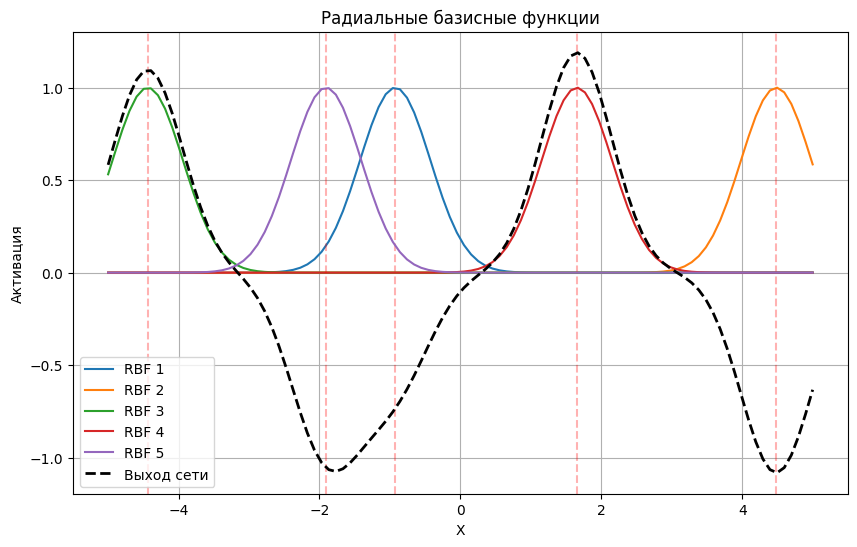

Визуализация в 2D


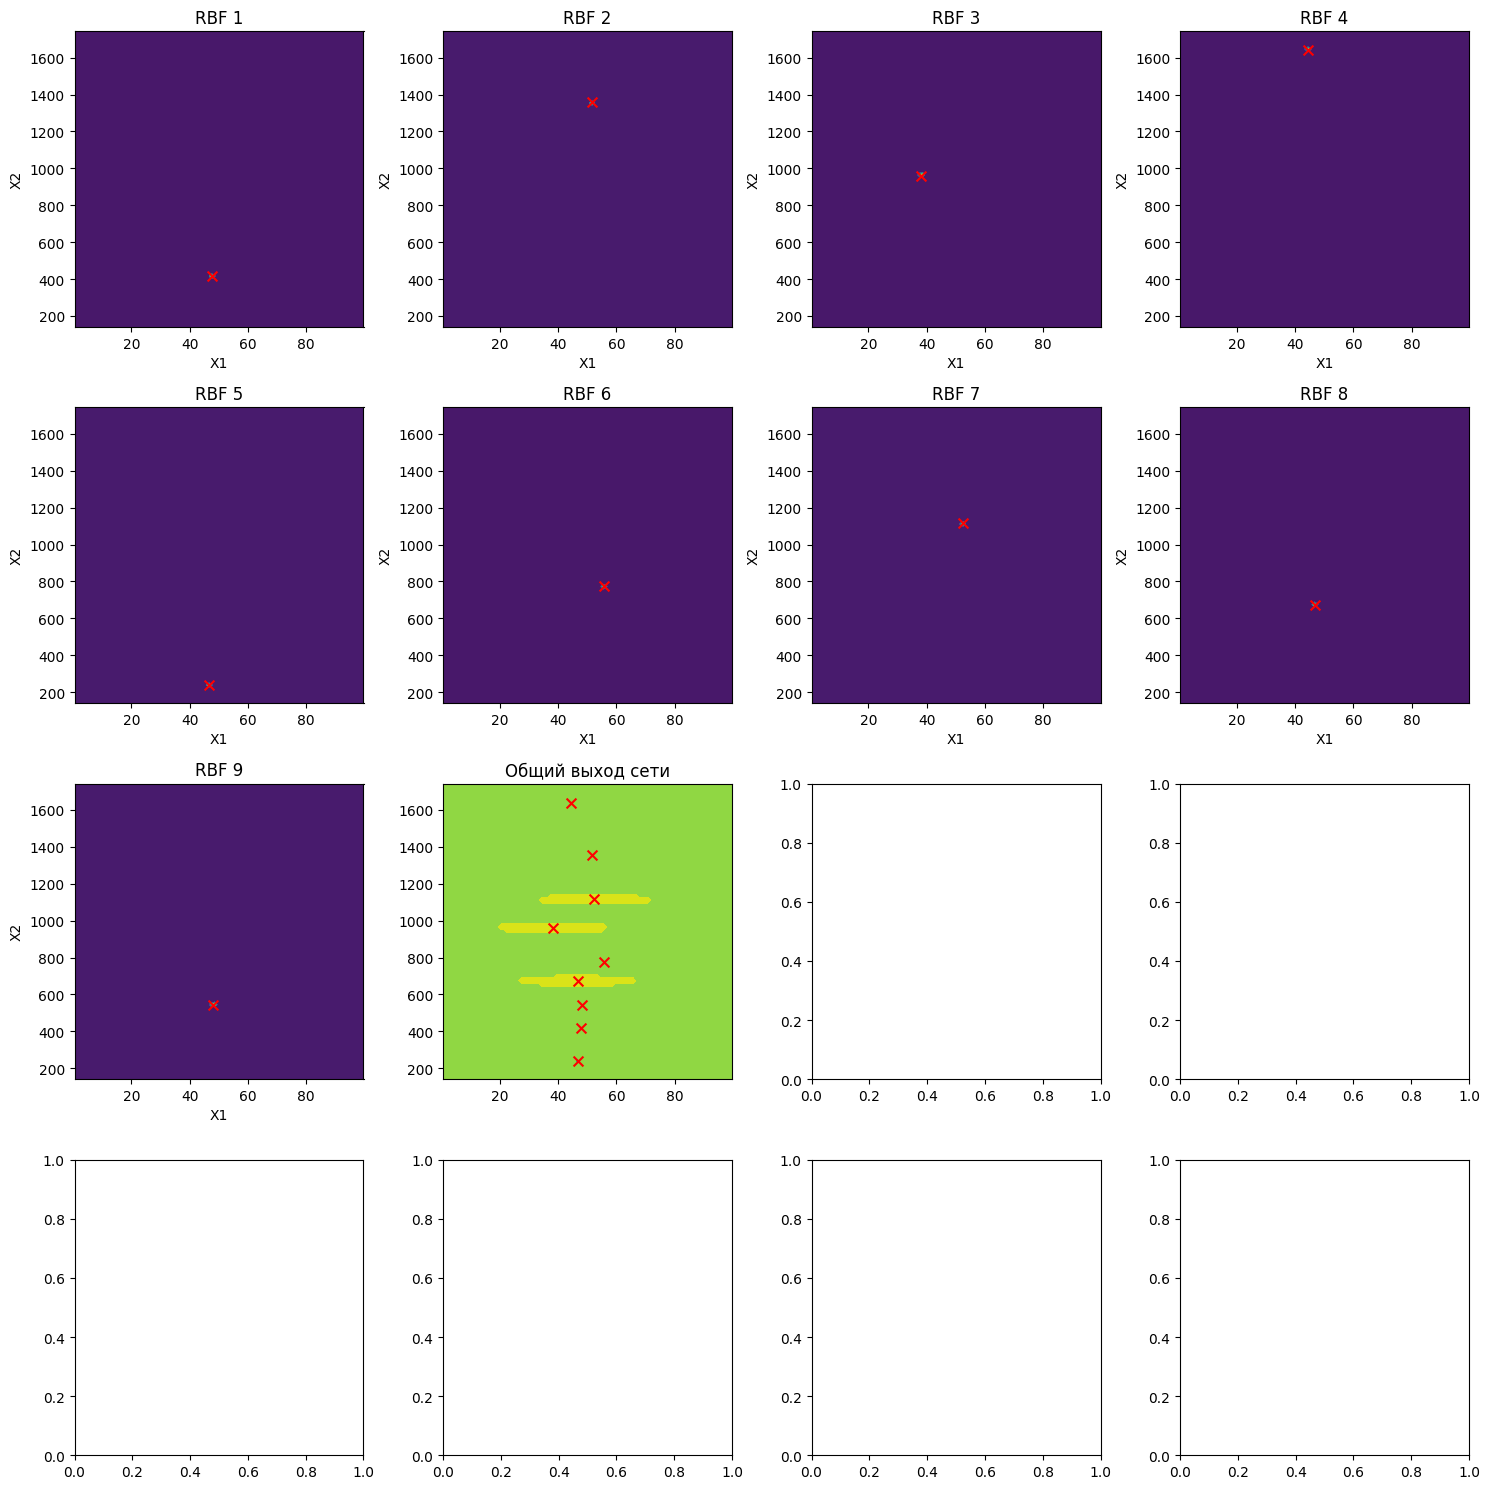

In [ ]:
def main():
    """
    Главная функция для запуска демонстраций
    """
    print("==== Демонстрация работы радиально-базисных нейронных сетей ====")

    # Выберите демонстрации для запуска
    print("\nДоступные демонстрации:")
    print("1. Базовая демонстрация формирования RBF функций")
    print("2. Визуализация процесса обучения")
    print("3. Эксперименты с количеством нейронов и шириной функций")
    print("4. Сравнение результатов на разных наборах данных")
    print("5. Расширенные эксперименты на сложных функциях")

    try:
        choice = int(input("\nВыберите демонстрацию (введите число от 1 до 5): "))

        if choice == 1:
            demo_rbf_formation()
        elif choice == 2:
            demo_training_process()
        elif choice == 3:
            demo_experiment_neurons_width()
        elif choice == 4:
            demo_dataset_comparison()
        elif choice == 5:
            demo_advanced_experiments()
        else:
            print("Некорректный выбор. Пожалуйста, введите число от 1 до 5.")
    except ValueError:
        print("Пожалуйста, введите целое число от 1 до 5.")

if __name__ == "__main__":
    main()